In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import plot

In [3]:
def plot_training(tests, ax):
    for test in tests:
        df = pd.read_csv(plot.get_test(test, data="summary"))
        ax.plot(df["meta_loss"], label=plot.get_name(test))
    ax.set_xlabel("Period (100 meta epochs; run 4x parallel)")
    ax.set_ylabel("Meta Loss")
    ax.legend()

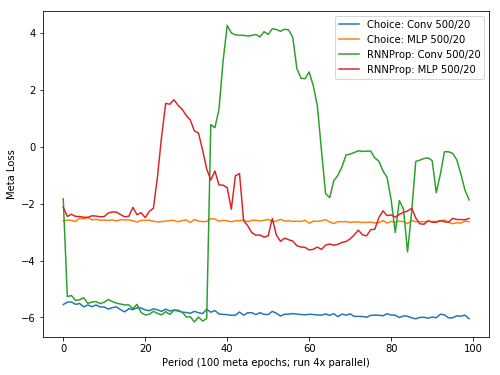

In [4]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
plot_training(["choice-20x25C", "choice-20x25M", "rnnprop-20x25C", "rnnprop-20x25M"], axs)
# axs.set_ylim(-2, 1)

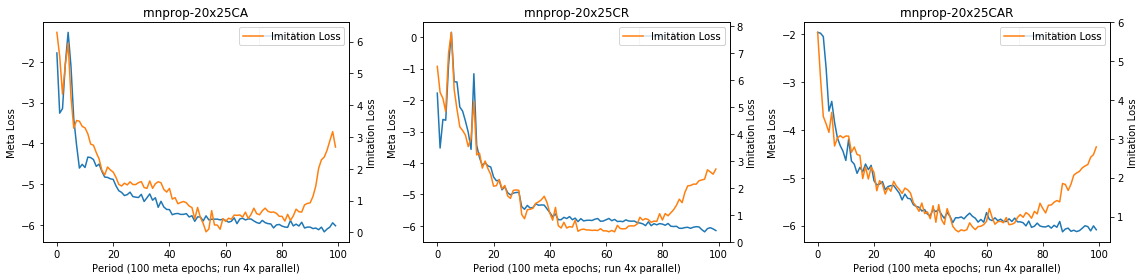

In [2]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

for test, ax in zip(["rnnprop-20x25CA", "rnnprop-20x25CR", "rnnprop-20x25CAR"], axs):
    df = pd.read_csv(plot.get_test(test, data="summary"))
    ax2 = ax.twinx()
    ax.plot(df["meta_loss"], label="Meta Loss", color='C0')
    ax2.plot(df["imitation_loss"], label="Imitation Loss", color='C1')
    ax.set_title(plot.get_name(test))

    ax.set_xlabel("Period (100 meta epochs; run 4x parallel)")
    ax.set_ylabel("Meta Loss")
    ax.legend()
    ax2.legend()
    ax2.set_ylabel("Imitation Loss")

fig.tight_layout()

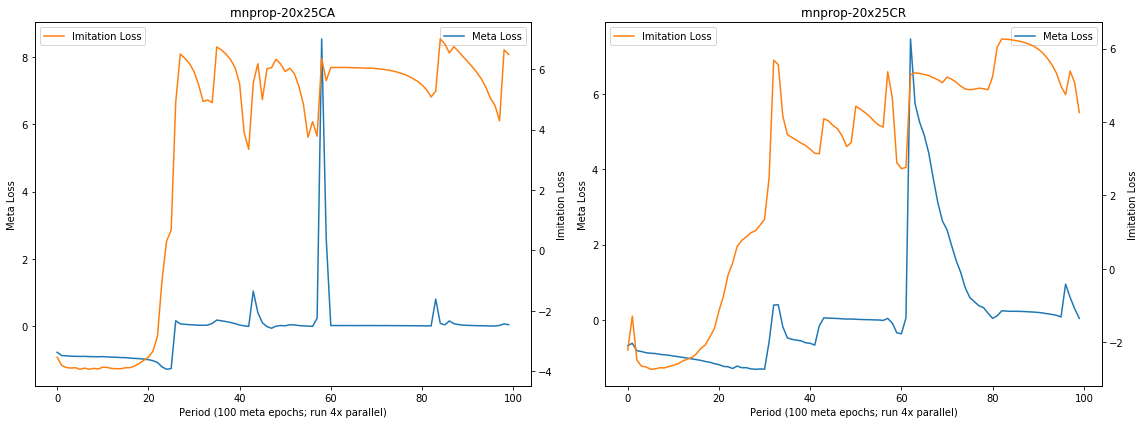

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

for test, ax in zip(["rnnprop-20x25CA", "rnnprop-20x25CR", "rnnprop-20x25CAR"], axs):
    df = pd.read_csv(plot.get_test(test, data="summary"))
    ax2 = ax.twinx()
    ax.plot(df["meta_loss"], label="Meta Loss", color='C0')
    ax2.plot(df["imitation_loss"], label="Imitation Loss", color='C1')
    ax.set_title(plot.get_name(test))

    ax.set_xlabel("Period (100 meta epochs; run 4x parallel)")
    ax.set_ylabel("Meta Loss")
    ax.legend()
    ax2.legend()
    ax2.set_ylabel("Imitation Loss")

fig.tight_layout()

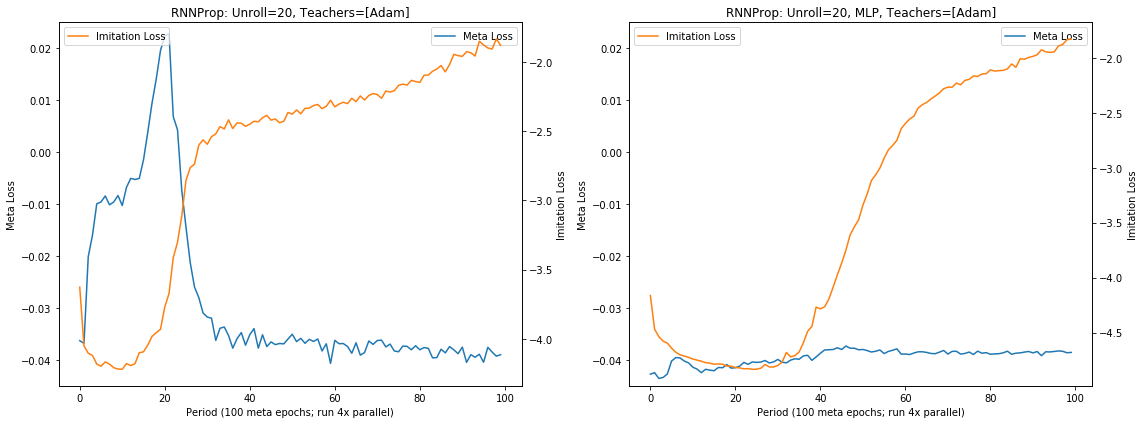

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

for test, ax in zip(["rnnprop_20_adam", "rnnprop_mlp_adam"], axs):
    df = pd.read_csv(plot.get_test(test, data="summary"))
    ax2 = ax.twinx()
    ax.plot(df["meta_loss"], label="Meta Loss", color='C0')
    ax2.plot(df["imitation_loss"], label="Imitation Loss", color='C1')
    ax.set_title(plot.get_name(test))

    ax.set_xlabel("Period (100 meta epochs; run 4x parallel)")
    ax.set_ylabel("Meta Loss")
    ax.set_ylim(-0.045, 0.025)
    ax.legend()
    ax2.legend()
    ax2.set_ylabel("Imitation Loss")

fig.tight_layout()


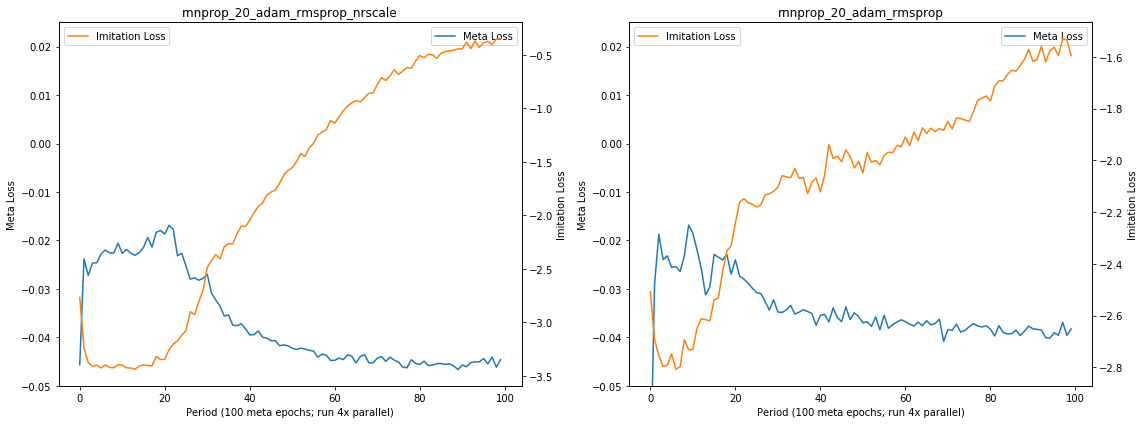

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

for test, ax in zip(["rnnprop_20_adam_rmsprop_nrscale", "rnnprop_20_adam_rmsprop"], axs):
    df = pd.read_csv(plot.get_test(test, data="summary"))
    ax2 = ax.twinx()
    ax.plot(df["meta_loss"], label="Meta Loss", color='C0')
    ax2.plot(df["imitation_loss"], label="Imitation Loss", color='C1')
    ax.set_title(plot.get_name(test))

    ax.set_xlabel("Period (100 meta epochs; run 4x parallel)")
    ax.set_ylabel("Meta Loss")
    ax.set_ylim(-0.05, 0.025)
    ax.legend()
    ax2.legend()
    ax2.set_ylabel("Imitation Loss")

fig.tight_layout()


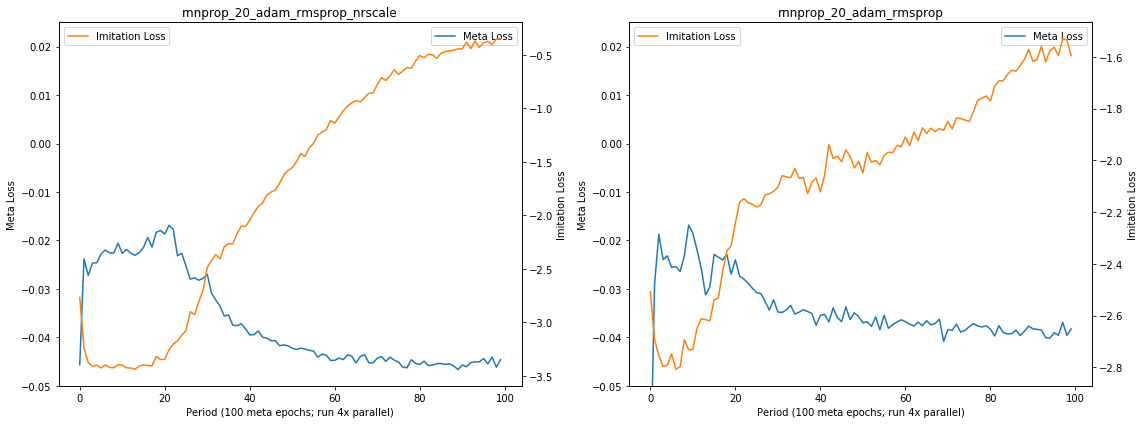

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

for test, ax in zip(["rnnprop_20_adam_rmsprop_nrscale", "rnnprop_20_adam_rmsprop"], axs):
    df = pd.read_csv(plot.get_test(test, data="summary"))
    ax2 = ax.twinx()
    ax.plot(df["meta_loss"], label="Meta Loss", color='C0')
    ax2.plot(df["imitation_loss"], label="Imitation Loss", color='C1')
    ax.set_title(plot.get_name(test))

    ax.set_xlabel("Period (100 meta epochs; run 4x parallel)")
    ax.set_ylabel("Meta Loss")
    ax.set_ylim(-0.05, 0.025)
    ax.legend()
    ax2.legend()
    ax2.set_ylabel("Imitation Loss")

fig.tight_layout()

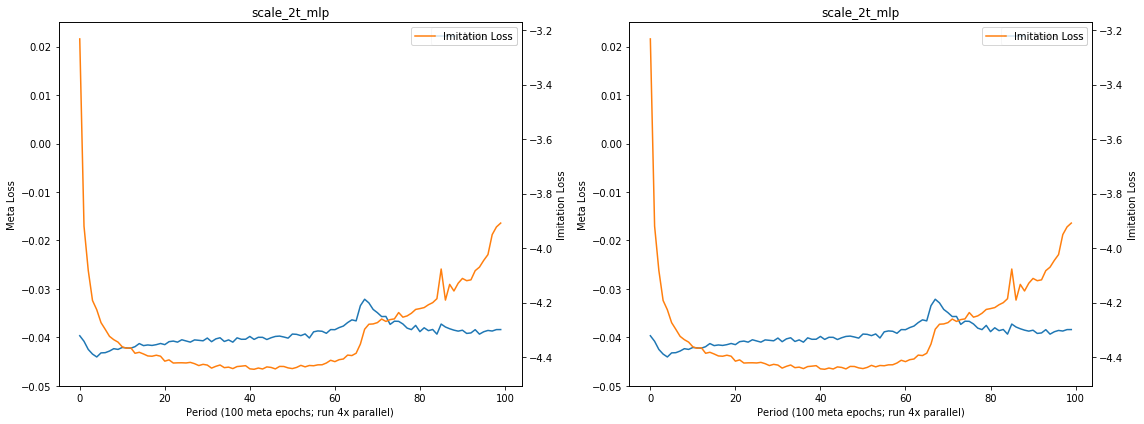

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

for test, ax in zip(["scale_2t_mlp", "scale_2t_mlp"], axs):
    df = pd.read_csv(plot.get_test(test, data="summary"))
    ax2 = ax.twinx()
    ax.plot(df["meta_loss"], label="Meta Loss", color='C0')
    ax2.plot(df["imitation_loss"], label="Imitation Loss", color='C1')
    ax.set_title(plot.get_name(test))

    ax.set_xlabel("Period (100 meta epochs; run 4x parallel)")
    ax.set_ylabel("Meta Loss")
    ax.set_ylim(-0.05, 0.025)
    ax.legend()
    ax2.legend()
    ax2.set_ylabel("Imitation Loss")

fig.tight_layout()